In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = r"C:\Users\Admin\Desktop\B23AI065_CVIP\mouse.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Load image as grayscale (0-255 pixel values)

In [3]:
# cv2.IMREAD_GRAYSCALE loads the image as grayscale (single channel) 
#  'image' is now a 2D NumPy array with intensity values from 0 to 255 
# Step 2: Define the piecewise linear contrast stretching function def contrast_stretch(img, r1, s1, r2, s2): 
""" Apply piecewise linear contrast stretching to a grayscale image. 
Parameters: img : 
2D NumPy array of grayscale image 
r1, r2 : input intensity thresholds (0-255) 
s1, s2 : output intensity levels corresponding to r1 and r2
Returns:
out : contrast-stretched image as 2D NumPy array 
"""

' Apply piecewise linear contrast stretching to a grayscale image. \nParameters: img : \n2D NumPy array of grayscale image \nr1, r2 : input intensity thresholds (0-255) \ns1, s2 : output intensity levels corresponding to r1 and r2\nReturns:\nout : contrast-stretched image as 2D NumPy array \n'

In [9]:
def contrast_stretch(img, r1, s1, r2, s2):
    out = np.zeros_like(img, dtype=np.uint8)
    mask1 = img <= r1
    out[mask1] = (s1 / r1) * img[mask1]
    mask2 = (img > r1) & (img <= r2)
    out[mask2] = ((s2 - s1)/(r2 - r1)) * (img[mask2] - r1) + s1
    mask3 = img > r2
    out[mask3] = ((255 - s2)/(255 - r2)) * (img[mask3] - r2) + s2
    return np.uint8(out)

In [10]:
r1, s1 = 70, 0
r2, s2 = 140, 255
stretched = contrast_stretch(image, r1, s1, r2, s2)

In [11]:
_, thresholded = cv2.threshold(stretched, 128, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

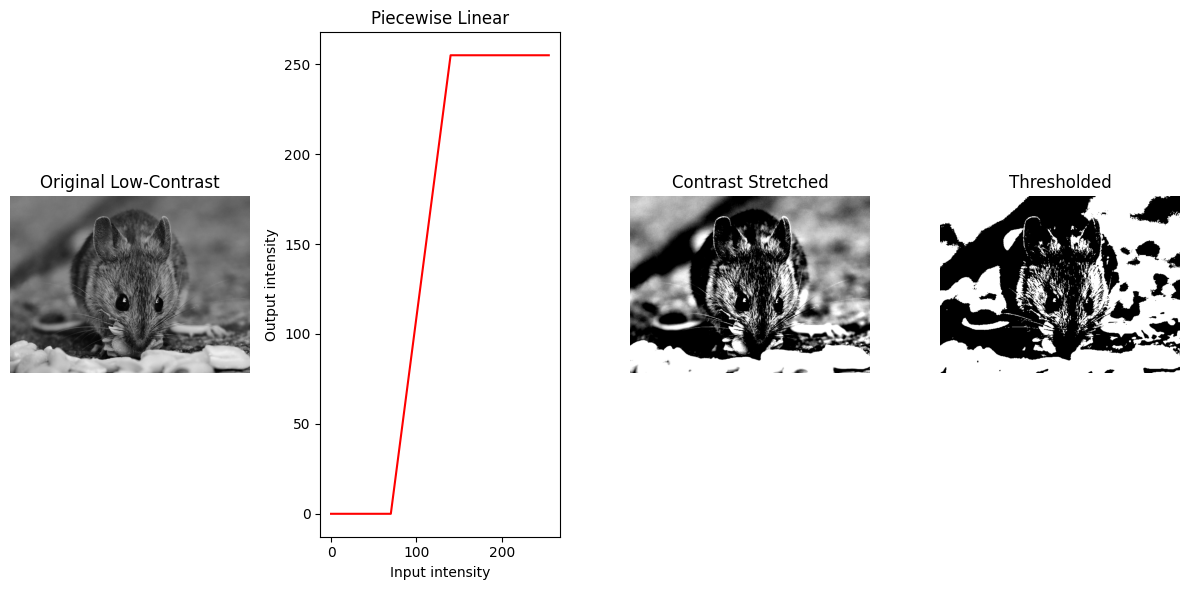

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Low-Contrast')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.plot([0, r1, r2, 255], [0, s1, s2, 255], 'r')
plt.title('Piecewise Linear')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')

plt.subplot(1, 4, 3)
plt.imshow(stretched, cmap='gray')
plt.title('Contrast Stretched')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded')
plt.axis('off')

plt.tight_layout()
plt.show()
